<a href="https://colab.research.google.com/github/MohammadRaziei/Deep-Learning-Course/blob/master/HW04/Q2/HW04_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW04 : Problem 2

Please check last updates and get the latest version from following link. it is more completed but it may have some updates after release it.

[<img src="https://img.icons8.com/clouds/50/000000/github.png"/>](https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/)  
github link : https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/HW04

In [2]:
!wget -q https://github.com/MohammadRaziei/DataSetsArchive/raw/master/NWPU%20VHR-10%20dataset.zip -O 'NWPU VHR-10 dataset.zip'
!unzip -oq "NWPU VHR-10 dataset.zip" 
!rm -f "NWPU VHR-10 dataset.zip" 
print('dataset is ready to use :)')

dataset is ready to use :)


In [12]:
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/net.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/test.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/transform.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/prepare_data.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/visual_dataset.py

## Part O

In [4]:
from pprint import pprint
from visual_dataset import getGroundTruthList
pprint(getGroundTruthList(17))

[{(52,515),(152,594), airplane},
 {(233,393),(312,452), airplane},
 {(258,472),(333,529), airplane},
 {(272,546),(368,622), airplane},
 {(175,109),(258,187), airplane},
 {(463,9),(543,93), airplane},
 {(521,124),(618,197), airplane},
 {(451,229),(535,311), airplane},
 {(773,352),(856,425), airplane},
 {(891,282),(973,370), airplane},
 {(387,382),(443,429), storageTank},
 {(403,437),(459,478), storageTank},
 {(423,489),(475,527), storageTank},
 {(466,355),(530,403), storageTank},
 {(490,417),(555,467), storageTank},
 {(523,324),(588,374), storageTank},
 {(548,384),(614,437), storageTank},
 {(615,291),(673,332), storageTank},
 {(634,343),(693,383), storageTank},
 {(654,389),(711,435), storageTank}]


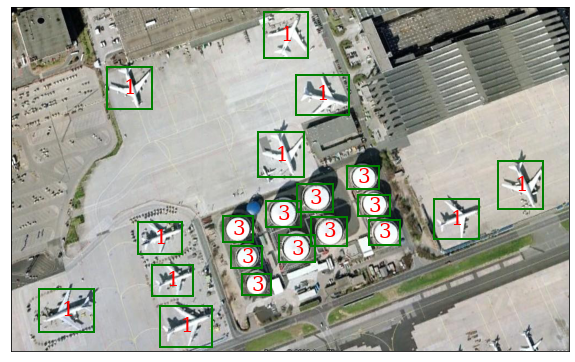

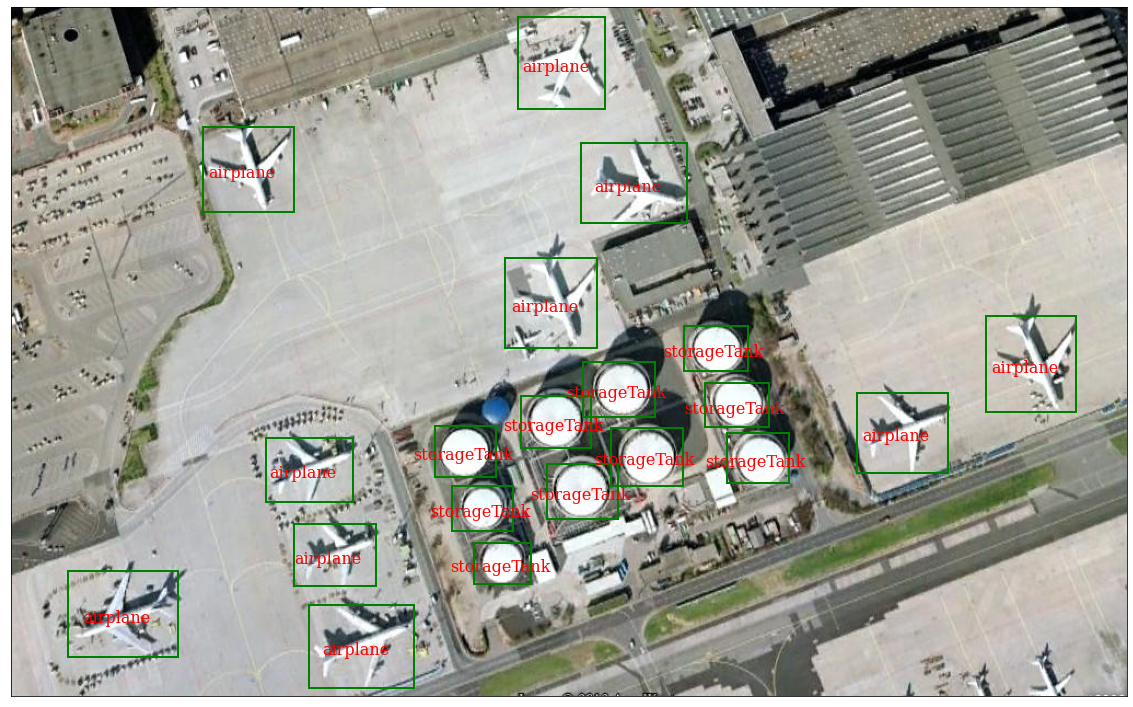

In [5]:
from visual_dataset import visual_dataset
visual_dataset(17, show_name=False, fontsize=20, figsize=(10,10))
visual_dataset(17)

## Part I

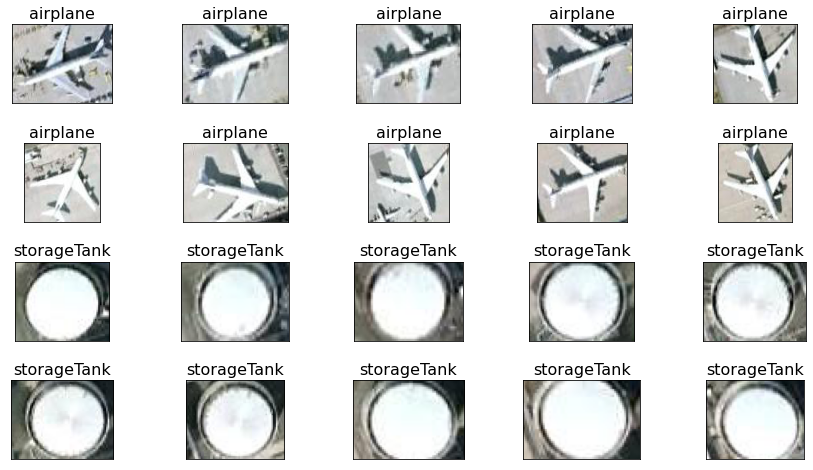

In [6]:
from prepare_data import prepare_data
import matplotlib.pyplot as plt


number = 17
cropped_images, classes = prepare_data(number)

fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.5)
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(cropped_images[i])
  plt.grid(False); plt.xticks([]); plt.yticks([])
  plt.title(classes[i].name, fontdict={'color':'black', 'fontsize':16})



In [7]:
categories = [cat.value for cat in classes]
categories 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

## Part II

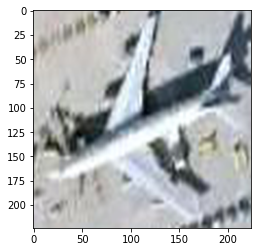

In [8]:
from transform import resize_image

img = cropped_images[0]
plt.imshow(resize_image(img, (224,224)))
plt.show()

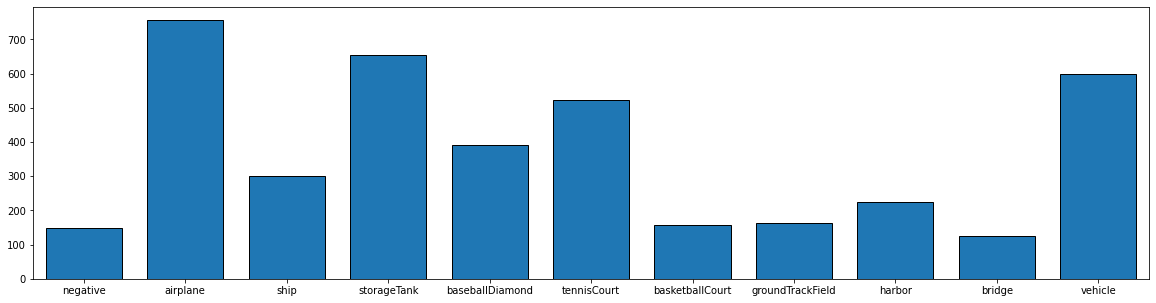

In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
from prepare_data import getGroundTruthList, ObjectType
from prepare_data import get_number_of_files


number_of_labeled_files, number_of_nonlabeled_files = get_number_of_files()

all_classes = np.array([]);
for i in range(1,number_of_labeled_files):
  groundTruthList = getGroundTruthList(i)
  classes_i = np.array([obj.object_type.value for obj in groundTruthList])
  all_classes = np.concatenate((all_classes, classes_i), axis=0)
all_classes = np.concatenate((all_classes, np.zeros(number_of_nonlabeled_files)), axis=0)

plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.hist(all_classes, bins=np.arange(0,12), rwidth=0.75, edgecolor='black')
ax.set_xticks(.5+np.arange(11))
ax.set_xlim(0,11)
ax.set_xticklabels([ObjectType(i).name for i in range(11)])
plt.show()


counts, bins = np.histogram(all_classes,bins=np.arange(-0.5,11.5), density=False)
P_removal = (counts - counts.min()) / counts

np.savez_compressed('unbalanced-info.npz', counts=counts, bins=bins, P_removal=P_removal, num_positive=number_of_labeled_files, num_negative=number_of_nonlabeled_files)

> make it balanced

Loading…: 100%|██████████████████████████| 649/649 [00:34<00:00, 18.73it/s]


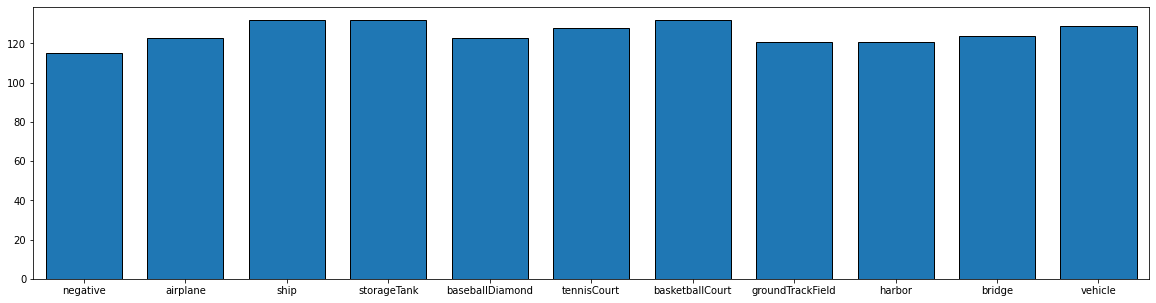

In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm 
from prepare_data import getGroundTruthList, ObjectType
from prepare_data import load_negative, load_positive, prepare_data

np.random.seed(0)
target_size = (224, 224)

all_classes = np.array([],dtype=np.uint8);
all_images = np.zeros((0,*target_size,3));
for i in tqdm(range(1,number_of_labeled_files), desc="Loading…",  ascii=False, ncols=75): 
    images_i, classes_i = prepare_data(i)
    classes_i = np.array([cat.value for cat in classes_i])
    index_to_remove = np.where(P_removal[classes_i] > np.random.uniform(size=classes_i.shape))[0]
    len_i = classes_i.shape[0];
    classes_i = np.array([classes_i[k] for k in range(len_i) if k not in index_to_remove])
    if classes_i.shape[0] == 0: continue
    images_i = np.array([resize_image(images_i[k],target_size) for k in range(len_i) if k not in index_to_remove])
     
    all_images = np.concatenate((all_images, images_i), axis=0).astype(np.uint8)
    all_classes = np.concatenate((all_classes, classes_i), axis=0)

classes_i = np.zeros(number_of_nonlabeled_files, dtype=np.int64)
images_i = [load_negative(i+1) for i in range(number_of_nonlabeled_files)]
len_i = classes_i.shape[0]
index_to_remove = np.where(P_removal[classes_i] > np.random.uniform(size=classes_i.shape))[0]
classes_i = np.array([classes_i[k] for k in range(len_i) if k not in index_to_remove])
if classes_i.shape[0] > 0:
  images_i = np.array([resize_image(images_i[k],target_size) for k in range(len_i) if k not in index_to_remove])
  all_classes = np.concatenate((all_classes,classes_i), axis=0)
  all_images = np.concatenate((all_images, images_i), axis=0).astype(np.uint8)

np.savez_compressed('all_images.npz', data=all_images)
np.savez_compressed('all_classes.npz', data=all_classes)

plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.hist(all_classes, bins=np.arange(0,12), rwidth=0.75, edgecolor='black')
ax.set_xticks(.5+np.arange(11))
ax.set_xlim(0,11)
ax.set_xticklabels([ObjectType(i).name for i in range(11)])
plt.show()


## Part III

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

all_categories = to_categorical(all_classes)
all_image_data = all_images.astype(np.float)/255.
x_train, x_test, y_train, y_test = train_test_split(all_image_data, all_categories, test_size = 0.2, shuffle=True) 
x_subtrain, x_valid, y_subtrain, y_valid = train_test_split(x_train, y_train, test_size = 0.2, shuffle=True) 

In [12]:
# from tesorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense
# load the model
pre_model = DenseNet121(weights='imagenet')
# Freeze all the layers
for layer in pre_model.layers[:]:
    layer.trainable = False

output = Dense(11,  activation='sigmoid', name='output')(pre_model.layers[-2].output)
pre_model = Model(inputs=pre_model.inputs, outputs=output)
pre_model.summary()
# plot_model(pre_model, show_shapes=True)


33193984/33188688 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_____________________________

In [13]:
pre_model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])
history = pre_model.fit(x_subtrain,
                    y_subtrain,
                    epochs=20,
                    verbose=2,
                    validation_data=(x_valid, y_valid),
                    batch_size=16
                    )

# save model and architecture to single file
pre_model.save("pre_train.h5")
print("Saved model to disk")

Epoch 1/20
56/56 - 18s - loss: 0.2940 - accuracy: 0.3952 - val_loss: 0.1811 - val_accuracy: 0.7285
Epoch 2/20
56/56 - 3s - loss: 0.1362 - accuracy: 0.8675 - val_loss: 0.1076 - val_accuracy: 0.9367
Epoch 3/20
56/56 - 3s - loss: 0.0865 - accuracy: 0.9649 - val_loss: 0.0775 - val_accuracy: 0.9638
Epoch 4/20
56/56 - 3s - loss: 0.0633 - accuracy: 0.9773 - val_loss: 0.0618 - val_accuracy: 0.9774
Epoch 5/20
56/56 - 3s - loss: 0.0498 - accuracy: 0.9807 - val_loss: 0.0508 - val_accuracy: 0.9774
Epoch 6/20
56/56 - 3s - loss: 0.0410 - accuracy: 0.9841 - val_loss: 0.0444 - val_accuracy: 0.9819
Epoch 7/20
56/56 - 3s - loss: 0.0351 - accuracy: 0.9864 - val_loss: 0.0400 - val_accuracy: 0.9774
Epoch 8/20
56/56 - 3s - loss: 0.0304 - accuracy: 0.9875 - val_loss: 0.0362 - val_accuracy: 0.9774
Epoch 9/20
56/56 - 3s - loss: 0.0269 - accuracy: 0.9875 - val_loss: 0.0337 - val_accuracy: 0.9774
Epoch 10/20
56/56 - 3s - loss: 0.0240 - accuracy: 0.9898 - val_loss: 0.0312 - val_accuracy: 0.9864
Epoch 11/20
56/56 

In [14]:
score, acc = pre_model.evaluate(x_test, y_test, batch_size=16)
print('Test score:', score)
print('Test accuracy:', acc)

18/18 [==============================] - 1s 74ms/step - loss: 0.0209 - accuracy: 0.9819
Test score: 0.020863210782408714
Test accuracy: 0.9818840622901917


In [15]:
yhat = pre_model.predict(x_test, batch_size=16)
yhat = yhat.argmax(axis=1) 
acc = np.sum(yhat==y_test.argmax(axis=1))/yhat.shape[0]
print('Real Test Accuracy:', acc)

Real Test Accuracy: 0.9818840579710145


## Part IV

### To test how it works

> Create sample dataset to see what is happend in DataAugmentaion process 

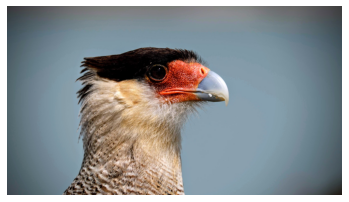

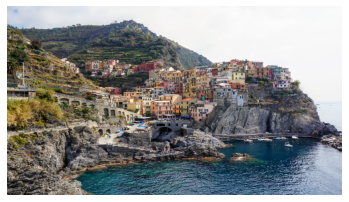

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import requests
from transform import resize_image

url = 'https://github.com/dufourpascal/stepupai/raw/master/tutorials/data_augmentation/image.jpg'
r = requests.get(url, allow_redirects=True)
open('image.jpg', 'wb').write(r.content)
url = 'https://github.com/dufourpascal/stepupai/raw/master/tutorials/data_augmentation/image_town.jpg'
r = requests.get(url, allow_redirects=True)
open('image_town.jpg', 'wb').write(r.content)

size=(800,450)

image = load_img('image.jpg')
image = img_to_array(image).astype(np.uint8)
data1 = np.expand_dims(resize_image(image,size), 0).astype(int)
plt.axis('off')
plt.imshow(data1[0])
plt.show()

image_town = load_img('image_town.jpg')
image_town = img_to_array(image_town).astype(np.uint8)
data2 = np.expand_dims(resize_image(image_town,size), 0).astype(int)
plt.axis('off')
plt.imshow(data2[0])
plt.show()
data=np.concatenate((data1,data2),axis=0)

> without changes:

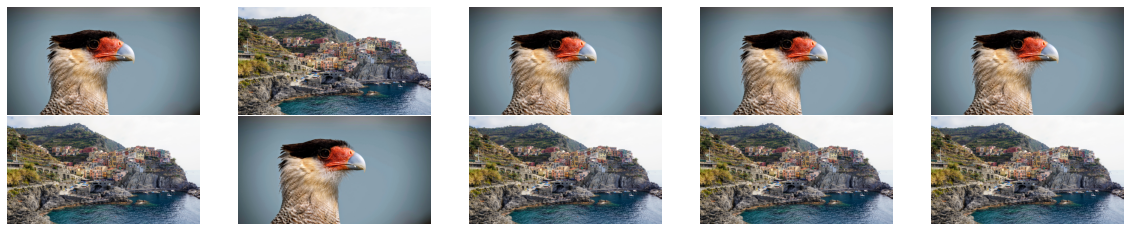

In [17]:
from transform import DataAugmentation
datagen = DataAugmentation(data)
datagen.plot(n_images=5)

> Width and Height Shift:

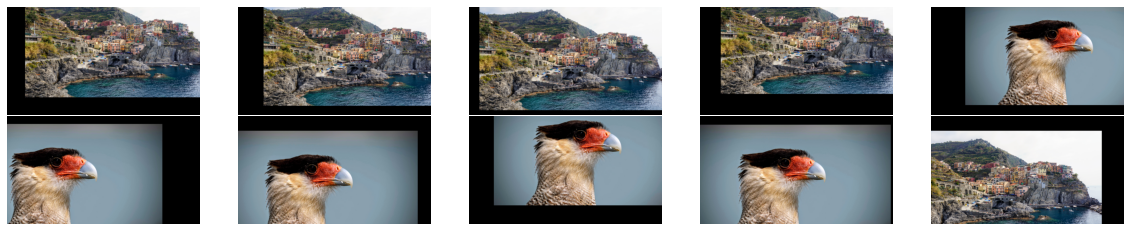

In [18]:
datagen = DataAugmentation(data)
datagen.width_shift_range = 0.2
datagen.height_shift_range = 0.2
datagen.plot(n_images=5)

> Image Flips:

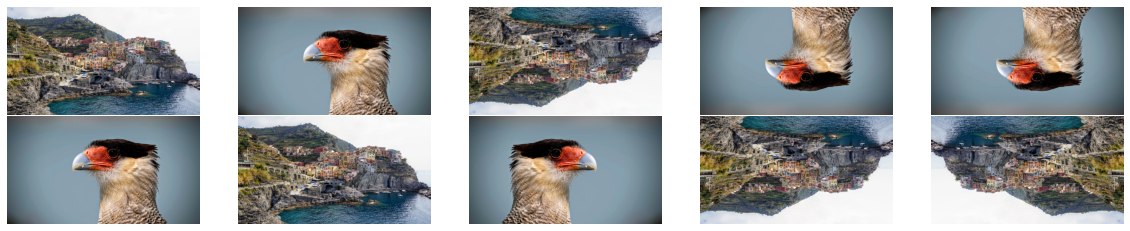

In [19]:
datagen = DataAugmentation(data)
datagen.horizontal_flip = True
datagen.vertical_flip = True
datagen.plot(n_images=5)

> Rotation:

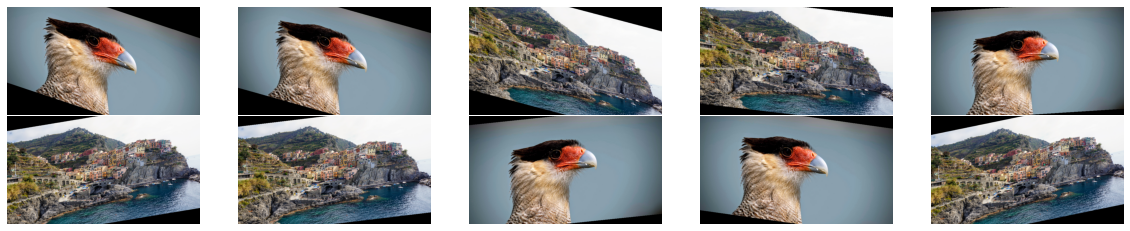

In [20]:
datagen = DataAugmentation(data)
datagen.shear_range = 20
datagen.plot(n_images=5)

> Zoom:

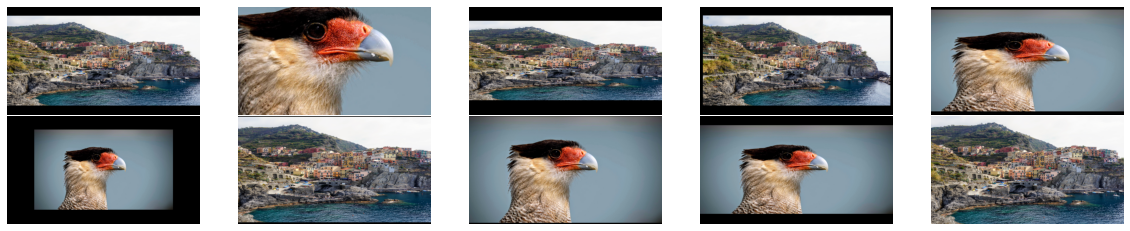

In [21]:
datagen = DataAugmentation(data)
datagen.zoom_range = [0.5, 1.5]
datagen.plot(n_images=5)

> Shear:

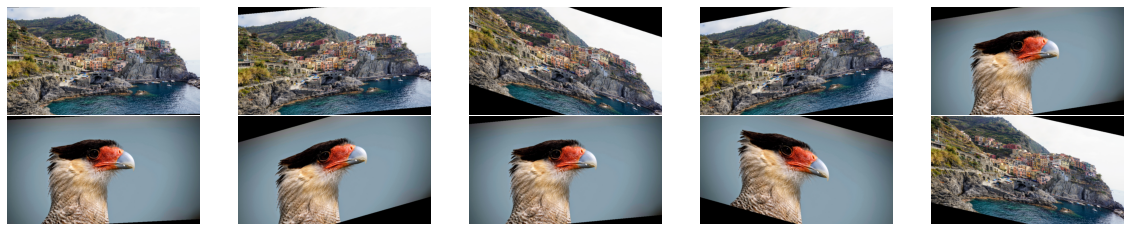

In [22]:
datagen = DataAugmentation(data)
datagen.shear_range = 20
datagen.plot(n_images=5)

> Brightness:

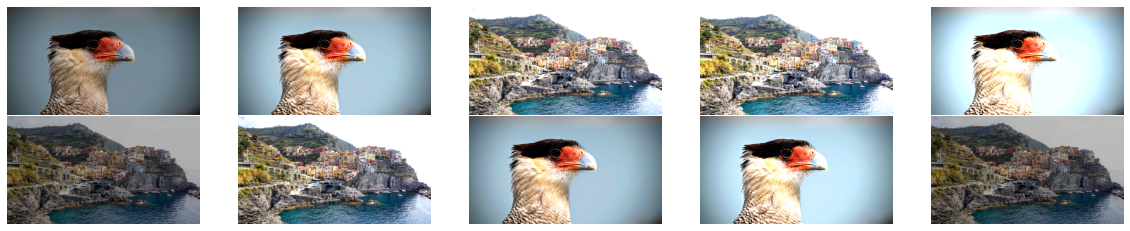

In [23]:
datagen = DataAugmentation(data)
datagen.brightness_range = [0.5, 2.0]
datagen.plot(n_images=5)

> Combining Multiple Transformations for Data Augmentation:

100%|██████████| 5/5 [00:00<00:00,  5.63it/s]


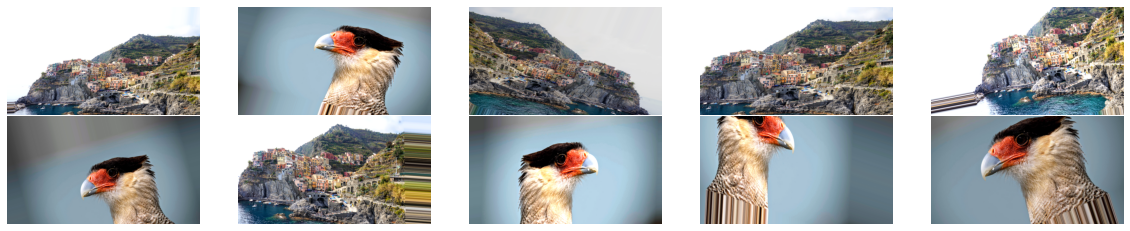

In [24]:
datagen = DataAugmentation(data,
              progressbar = True,
              fill_mode='nearest',
							horizontal_flip=True,
							width_shift_range=0.2,
							height_shift_range=0.2,
							zoom_range=[0.8, 1.2],
							rotation_range=20,
							shear_range=10,
							brightness_range = [0.75, 1.5])
datagen.plot(n_images=5)

### Use it and make dataset balanced

In [ ]:
raise Exception('Dont wory! stop here and clear your RAM')

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

from prepare_data import getGroundTruthList, ObjectType
from prepare_data import prepare_data, load_negative
from transform import resize_image

info = np.load('unbalanced-info.npz') #list(info.keys())
counts, bins, P_removal, num_positive, num_negative = info['counts'], info['bins'], info['P_removal'], info['num_positive'], info['num_negative']

np.random.seed(0)
target_size = (100, 100)

all_classes = np.array([],dtype=np.uint8);
all_images = np.zeros((0,*target_size,3));
for i in tqdm(range(1, num_positive), desc="Loading…",  ascii=False, ncols=75): 
    images_i, classes_i = prepare_data(i)
    classes_i = np.array([cat.value for cat in classes_i]);    len_i = classes_i.shape[0];
    images_i = np.array([resize_image(images_i[k],target_size) for k in range(len_i)])
     
    all_images = np.concatenate((all_images, images_i), axis=0).astype(np.uint8)
    all_classes = np.concatenate((all_classes, classes_i), axis=0)

classes_i = np.zeros(num_negative, dtype=np.int64)
images_i = [load_negative(i+1) for i in range(num_negative)];      len_i = classes_i.shape[0]
images_i = np.array([resize_image(images_i[k],target_size) for k in range(len_i)])
all_classes = np.concatenate((all_classes,classes_i), axis=0)
all_images = np.concatenate((all_images, images_i), axis=0).astype(np.uint8)


num_images = all_classes.shape[0]
all_data = [[] for _ in range(11)]
for i in tqdm(range(1, num_images), desc="Preparing…",  ascii=False, ncols=75): 
    all_data[all_classes[i]].append(all_images[i])
all_data = [np.array(i) for i in all_data]
np.savez_compressed('all_data.npz', data=all_data)

Preparing…: 100%|█████████████████| 4043/4043 [00:00<00:00, 1066379.77it/s]
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [3]:
import numpy as np
import transform
from transform import DataAugmentation
import shutil, os
from tqdm.auto import tqdm  # notebook compatible


augmented_folder = 'augmented'
augmented_subfolder = os.path.join(augmented_folder,'{}')

def create_augmented_directory():
  try:
    try: shutil.rmtree(augmented_folder)
    except: pass
    os.mkdir(augmented_folder)
    for i in range(11):
      os.mkdir(augmented_subfolder.format(i))
  except Exception as e: # work on python 3.x
    print('Some error! : '+ str(e))

all_data = np.load('all_data.npz', allow_pickle=True)['data']
info = np.load('unbalanced-info.npz') 
counts, bins, P_removal, num_positive, num_negative = info['counts'], info['bins'], info['P_removal'], info['num_positive'], info['num_negative']

dataAugSetting = {'progressbar_module': tqdm,
      'fill_mode':'nearest',
      'horizontal_flip':True,
      'width_shift_range':0.1,
      'height_shift_range':0.1,
      'zoom_range':[0.8, 1.2],
      'rotation_range':10,
      'shear_range':10,
      'brightness_range': [0.75, 1.5]}

# datagen = DataAugmentation(data,**dataAugSetting)

In [4]:
max_aug = int(counts.max()*1.1)

create_augmented_directory()
for i in tqdm(range(11)): 
  data = all_data[i]
  num_iter = max_aug-data.shape[0]
  datagen = DataAugmentation(data,**dataAugSetting)
  datagen.save_flow(num_iter=num_iter, save_to_dir=augmented_subfolder.format(i))

In [5]:
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm.auto import trange

augmented_folder = 'augmented'
augmented_subfolder = os.path.join(augmented_folder,'{}')

augmented_data = [np.array([plt.imread(os.path.join(augmented_subfolder.format(i),name)) for name in os.listdir(augmented_subfolder.format(i))]) for i in trange(11)]
np.savez_compressed('augmented_data.npz', data=augmented_data)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [6]:
import numpy as np
from tqdm.auto import trange

all_data = np.load('all_data.npz', allow_pickle=True)['data']
augmented_data = np.load('augmented_data.npz', allow_pickle=True)['data']

total_data = all_data
for i in trange(11):
  total_data[i] = np.concatenate((augmented_data[i],all_data[i]), axis=0)
  np.random.shuffle(total_data[i])
  
np.savez_compressed('total_data.npz', data=total_data)

832.0


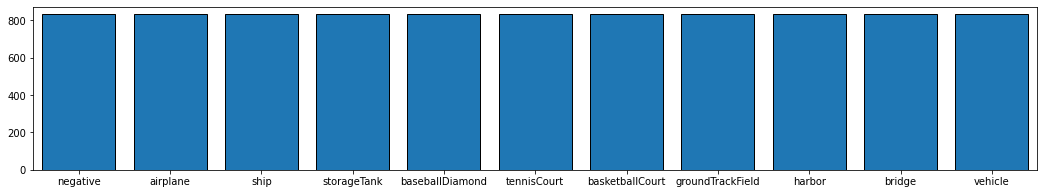

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from prepare_data import ObjectType
total_data = np.load('total_data.npz', allow_pickle=True)['data']

total_bins = np.arange(11)#np.arange(-0.5,11.5)
total_counts = [i.shape[0] for i in total_data]
print(np.mean(total_counts))

fig, ax = plt.subplots()
fig.set_size_inches(18,3)
# ax.yaxis.set_major_formatter(formatter)
ax.bar(total_bins, total_counts, edgecolor='black')
plt.xlim([-.5,10.5])
plt.xticks(total_bins, [ObjectType(i).name for i in total_bins])
# plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from tqdm.auto import trange

total_data = np.load('total_data.npz', allow_pickle=True)['data']
total_data = np.concatenate(total_data, axis=0)

total_counts = [i.shape[0] for i in total_data]
total_classes = [np.full((total_counts[i]),i) for i in range(len(total_counts))]
total_classes = np.concatenate(total_classes, axis=0)

np.savez_compressed('dataset.npz', data=total_data, classes=total_classes, counts=total_counts)

In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

dataset = np.load('dataset.npz', allow_pickle=True)
images  = dataset['data']
classes = dataset['classes']
counts  = dataset['counts']
del dataset

In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

images  = np.load('all_images.npz', allow_pickle=True)['data']
classes = np.load('all_classes.npz', allow_pickle=True)['data']


KeyError: ignored

In [1]:
categories = to_categorical(classes)
# images = images.astype(np.float)/255.
x_train, x_test, y_train, y_test = train_test_split(images, categories, test_size = 0.1, shuffle=False) 
x_subtrain, x_valid, y_subtrain, y_valid = train_test_split(x_train, y_train, test_size = 0.1, shuffle=False) 

np.savez_compressed('dataset_shuffle.npz', x_test=x_test, y_test=y_test, x_subtrain=x_subtrain, y_subtrain=y_subtrain, x_valid=x_valid, y_valid=y_valid)

NameError: ignored

# Part V

## Part VI

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import pyramid_gaussian
from transform import resize_image

from prepare_data import get_number_of_files, load_negative, load_positive, prepare_data, getGroundTruthList
num_scales = 4
image = load_positive(17)
print(image.shape)
target_size = (224,224)
scale= min(target_size)/min(image.shape[:-1]) *1.25* 2**(num_scales-1)
image = resize_image(image, target_size= (int(image.shape[1]*scale),int(image.shape[0]*scale)))
print(image.shape)

pyramid = tuple(pyramid_gaussian(image, max_layer=num_scales-1, downscale=2, multichannel=True))

fig, ax = plt.subplots(1, num_scales, gridspec_kw={'width_ratios': [2**i for i in range(num_scales-1,-1,-1)]})
for i in range(num_scales):
    ax[i].imshow(pyramid[i])
fig.set_size_inches(20,5)

In [ ]:
overlap = 0.2
def get_image_slides(image,overlap=0.2,target_size=target_size):
    def calculate_number(tar_size,im_size,overlap):
      return int((im_size/tar_size-1)/(1-overlap))
    ncol = calculate_number(target_size[1],image.shape[1],overlap)
    nrow = calculate_number(target_size[0],image.shape[0],overlap)
    images = []
    for col in range(ncol):
      for row in range(nrow):
        c_start = col*int(target_size[1]*(1-overlap))
        c_end = c_start + target_size[1]    
        r_start = row*int(target_size[0]*(1-overlap))
        r_end = r_start + target_size[0]
        # print(r_start,r_end,c_start,c_end)
        img = image[r_start:r_end,c_start:c_end,:]
        images.append(img)
    images = np.array(images)
    return images

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('pre_train.h5')

In [ ]:
images = get_image_slides(pyramid[0],overlap=0.75,target_size=target_size).astype(np.float) / 255.
# images = x_test;
yhat = model.predict(images)
######
# def estimate(images, thresh=0.2):
#   yhat > thresh
# index = []
# for i in range(yhat.shape[0]):
#   ind = np.where(yhat[i]>0.)[0]
#   ind_max = yhat[i][ind].argmax()
#   print(ind_max)
#   ind_max = ind_max if ind_max.shape else 0
#   index.append(ind_max)